# Convex_Function

In [1]:
import numpy as np

a_array = np.arange(-1.5, 3, 0.01)
a_array = a_array.reshape(a_array.shape[0],1)

np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})

In [2]:
import math
def get_objective(a):
    result = (-math.sin(3*a) - a**2 + 0.7*a)#-(a**2)
    return result

In [132]:
def get_objective(a, other=False):
    result = (-math.sin(3*a) - a**2 + 0.7*a) + 0*int(a)
    if other:
        result = -result
    return result

In [133]:
import math

accuracy_all=[]
a_ideal =0

for a in a_array:
    results = get_objective(a)
    accuracy_all.append(results)
    
accuracy_all= np.array(accuracy_all)

print(accuracy_all.shape)

print("Idea Values of a:",a_array[np.argmax(accuracy_all)],np.max(accuracy_all))

(450, 1)
Idea Values of a: [-0.36] 0.5003578068849475


# Plot of the exact  objective

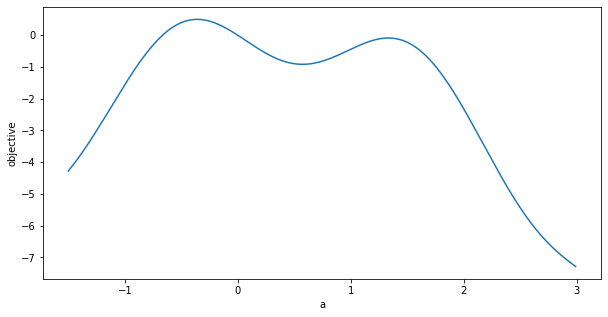

In [134]:
import matplotlib.pyplot as plt

def plot_exact_function():
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)

    ax.plot(a_array, accuracy_all)

    ax.set_xlabel('a')
    ax.set_ylabel('objective')
    plt.show()

plot_exact_function()

# Initial Values for BL

In [135]:
a1 = 0.5
accuracy1 = get_objective(a1)
print('accuracy1 = ',accuracy1)

a2 = 0.5
accuracy2 = get_objective(a2, other=True)

print('accuracy2 = ',accuracy2)


X_init = np.array([[a1], [a2]])
Y_init= np.array([accuracy1, accuracy2])

Y_init = Y_init.reshape(Y_init.shape[0],1)

accuracy1 =  -0.8974949866040546
accuracy2 =  0.8974949866040546


In [136]:
print(X_init.shape,Y_init.shape)

(2, 1) (2, 1)


In [137]:
# Domain Size = |D|
Domain_Size = a_array.shape[0]
print(Domain_Size)

450


# Plot the Gaussian Process predictions

In [138]:
def Plot_the_function_and_Exact_values(gpr,X_samples,Y_samples, aq_fn_values):
    
    fig = plt.figure(figsize=(15,8))
    
    ax = fig.add_subplot(1, 2, 1)
    accuracy_pred, sigma = gpr.predict(a_array, return_std=True)
    sigma = sigma.reshape(sigma.shape[0],1)
    accuracy_pred = accuracy_pred.reshape(accuracy_pred.shape[0],1)
    
    accuracy_pred1 = accuracy_pred +  5*sigma
    
    accuracy_pred2 = accuracy_pred - 5*sigma
    
    return_acc1 = np.max(accuracy_pred)    
    ax.plot(a_array, accuracy_pred,label='Surrogate function',lw=2)
    
    ax.fill_between(a_array.ravel(), 
                     accuracy_pred.ravel() + 1.96 * sigma.ravel(), 
                     accuracy_pred.ravel() - 1.96 * sigma.ravel(), 
                     alpha=0.1,label="uncertainity") 
    
    #plotting the samples
    ax.plot(X_samples, Y_samples, 'kx', mew=3, label='Samples')
    
    
    ax.plot(a_array, accuracy_all, 'y--', lw=2, label='Noise-free objective')
    
    ax.plot(a_array, aq_fn_values, 'r--', lw=2, label='Aq function')
    
    plt.legend()
    plt.show()
    
    return return_acc1
    


# UCB

In [143]:
def Upper_Confidence_Bound(X, gpr,t):
    ''' Compute the upper confidence bound '''
    mu, sigma = gpr.predict(X, return_std=True)
    mu = mu.reshape(mu.shape[0],1)
    sigma = sigma.reshape(sigma.shape[0],1)
    
    alpha = 2*math.log(Domain_Size*(t)*(t)*math.pi*math.pi/(6*0.1))
    alpha = math.sqrt(alpha)
#     alpha = 3
    print("alpha: ", alpha)
    Value = mu + (alpha)*sigma    
    x_index = np.argmax(Value)
    return X[x_index], Value

In [144]:
X_matrix = a_array

In [145]:
# Functions from the Mango library 
from scipy.stats import uniform
from mango.domain.distribution import loguniform
from mango.domain.domain_space import domain_space


param_dict = {"a": uniform(-1.5, 4.5)}

ds = domain_space(param_dict,450)

# Bayesian learning Sequential Iterations

Starting GPR Assumption
Iteration count: 1
alpha:  4.221263549751225
alpha:  4.221263549751225
2.9823201241312383 -7.266451525245936


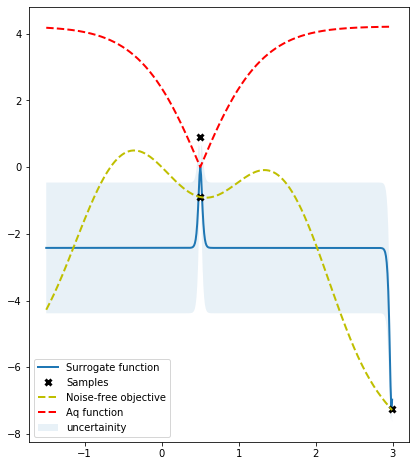

Iteration count: 2
alpha:  4.537802847050331
alpha:  4.537802847050331
0.47033301199879984 -0.8792395921354687


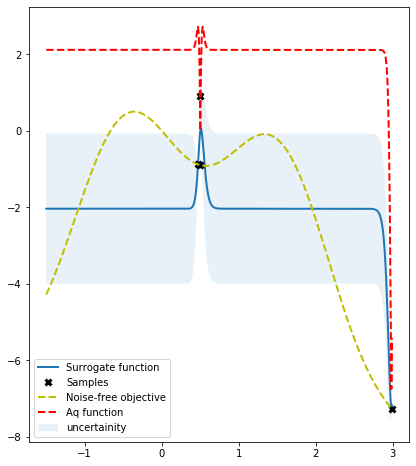

Iteration count: 3
alpha:  4.713121588833748
alpha:  4.713121588833748
0.5700978292726031 -0.9162290931906318


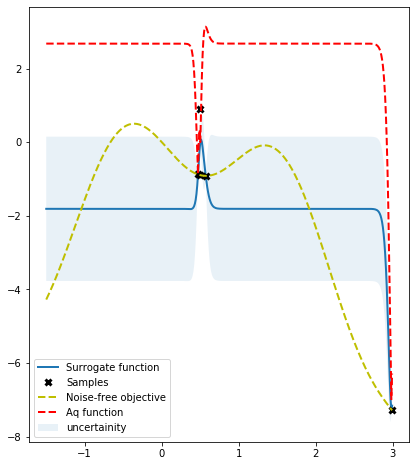

Iteration count: 4
alpha:  4.833657352454544
alpha:  4.833657352454544
0.6822991284575406 -0.876711337020301


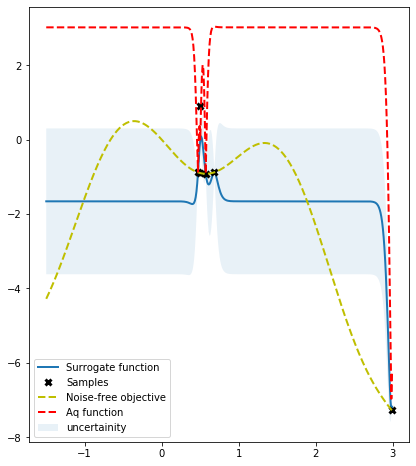

Iteration count: 5
alpha:  4.925121075282791
alpha:  4.925121075282791
0.7874133769575615 -0.7716494337912306


/Users/mohagg01/.local/share/virtualenvs/mango/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:346: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


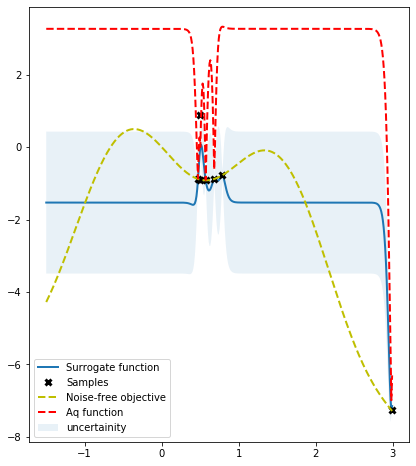

Iteration count: 6
alpha:  4.998610190179919
alpha:  4.998610190179919
0.8888790164630871 -0.625189560251151


/Users/mohagg01/.local/share/virtualenvs/mango/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:346: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


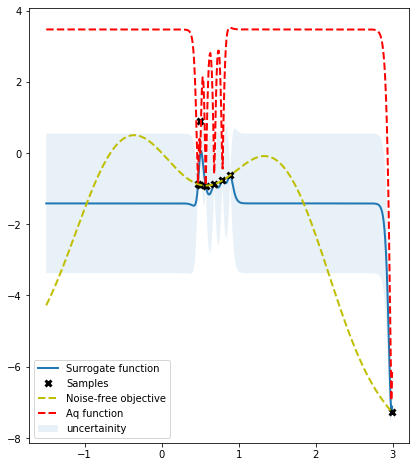

Iteration count: 7
alpha:  5.059911713921456
alpha:  5.059911713921456
0.9766457062013747 -0.48026361893050407


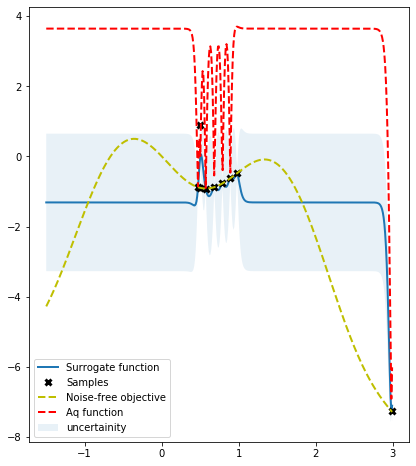

Iteration count: 8
alpha:  5.112419400164432
alpha:  5.112419400164432
1.0669522524638602 -0.3322911139861997


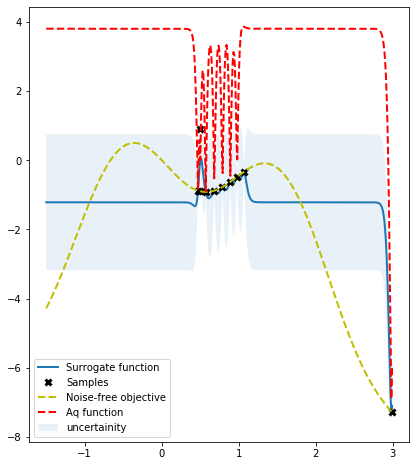

Iteration count: 9
alpha:  5.158290827958733
alpha:  5.158290827958733
1.1445450670523845 -0.2208929776327383


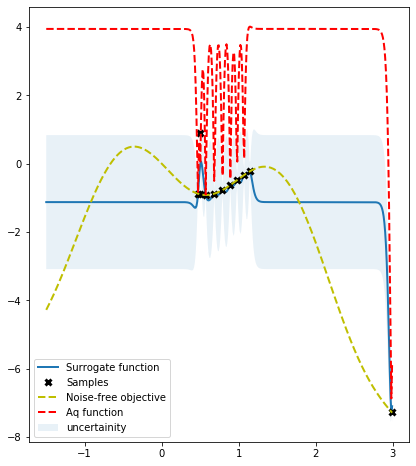

Iteration count: 10
alpha:  5.1989812779461415
alpha:  5.1989812779461415
1.2200872821303101 -0.13882708035107505


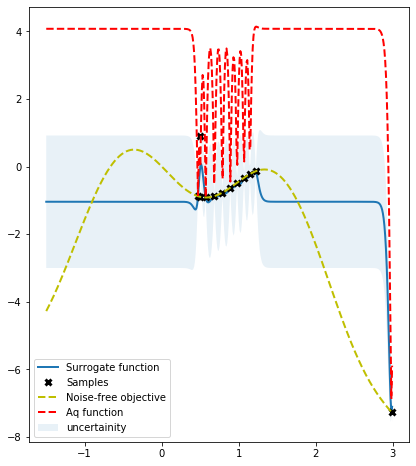

Iteration count: 11
alpha:  5.235517839493224
alpha:  5.235517839493224
1.308324432566494 -0.09020697656669519


/Users/mohagg01/.local/share/virtualenvs/mango/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:346: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


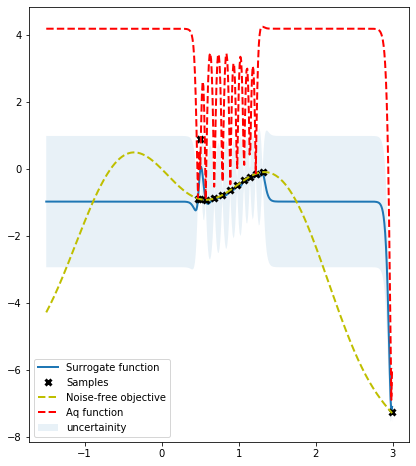

Iteration count: 12
alpha:  5.268651872690993
alpha:  5.268651872690993
1.3908998000216606 -0.10310415571828246


/Users/mohagg01/.local/share/virtualenvs/mango/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:346: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


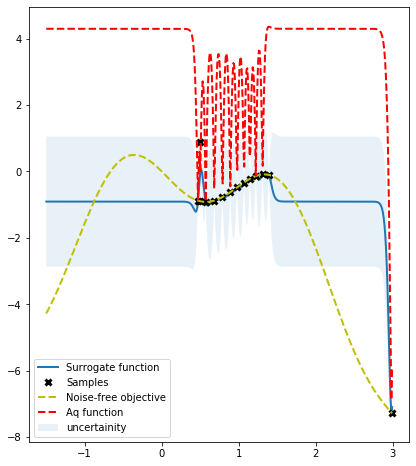

Iteration count: 13
alpha:  5.298949271912731
alpha:  5.298949271912731
1.4703476482540205 -0.17774100987284158


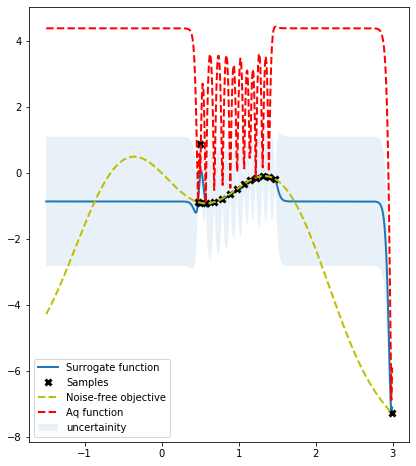

Iteration count: 14
alpha:  5.3268466539707475
alpha:  5.3268466539707475
1.5607527118499411 -0.3438760288155924


/Users/mohagg01/.local/share/virtualenvs/mango/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:346: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


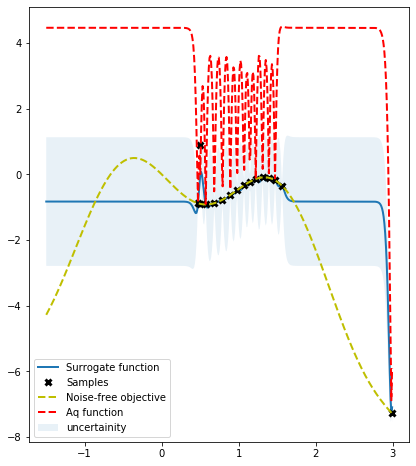

Iteration count: 15
alpha:  5.352687807155126
alpha:  5.352687807155126
1.655718887192279 -0.6146799414433501


/Users/mohagg01/.local/share/virtualenvs/mango/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:346: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


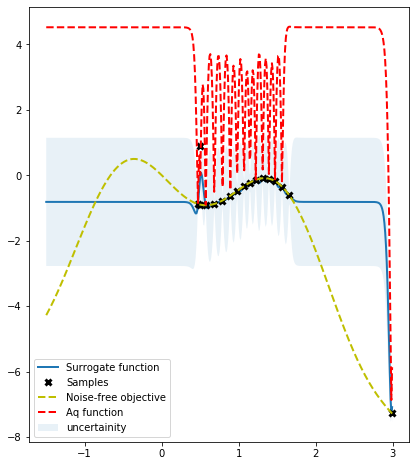

Iteration count: 16
alpha:  5.376748166449442
alpha:  5.376748166449442
1.7843979883966008 -1.1333828243152093


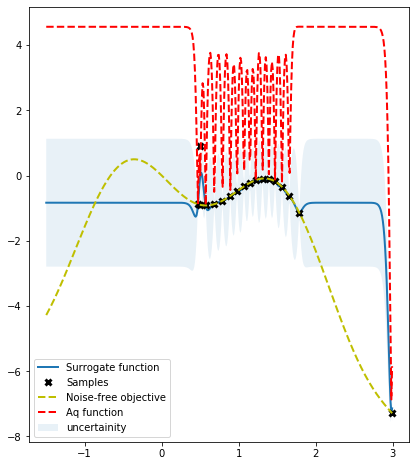

Iteration count: 17
alpha:  5.399251738221063
alpha:  5.399251738221063
-1.1001610673824624 -2.1386899494062726


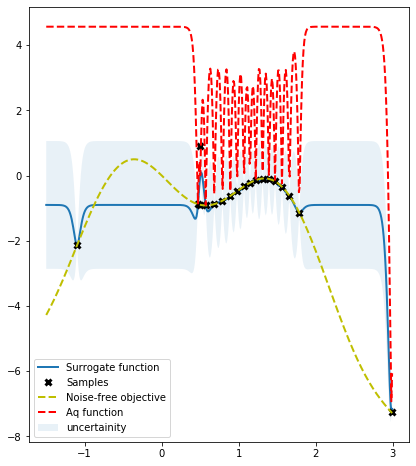

Iteration count: 18
alpha:  5.420383103438628
alpha:  5.420383103438628
-0.3145671294665109 0.4905861285289477


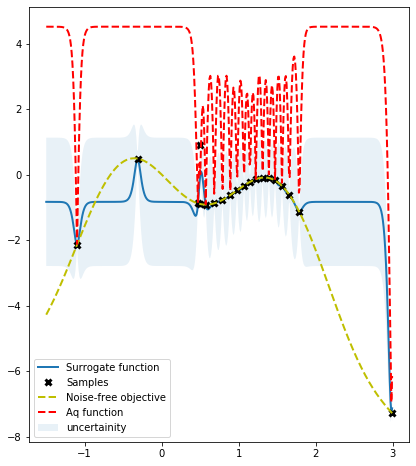

Iteration count: 19
alpha:  5.440296119985021
alpha:  5.440296119985021
-0.23464862250828156 0.42791661836726413


/Users/mohagg01/.local/share/virtualenvs/mango/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:346: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


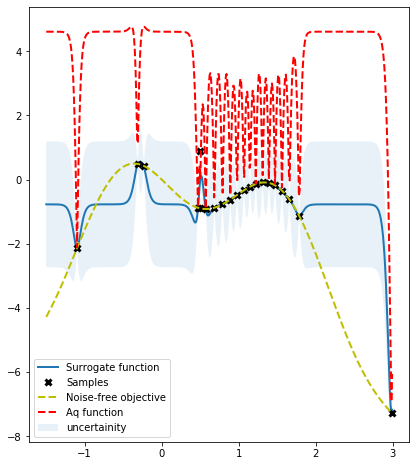

Iteration count: 20
alpha:  5.45912035502738
alpha:  5.45912035502738
-0.4251730930187909 0.4783282326438608


/Users/mohagg01/.local/share/virtualenvs/mango/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:346: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/mohagg01/.local/share/virtualenvs/mango/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:346: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


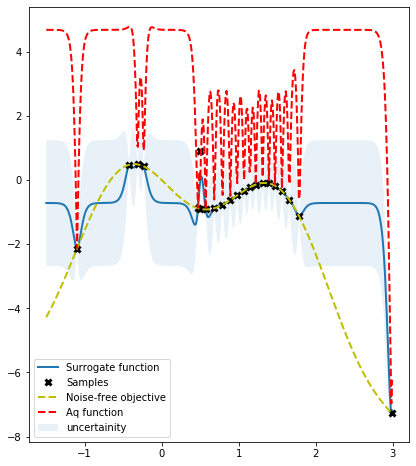

Iteration count: 21
alpha:  5.476965921689855
alpha:  5.476965921689855
-0.5253101580059722 0.35631894758665694


/Users/mohagg01/.local/share/virtualenvs/mango/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:346: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


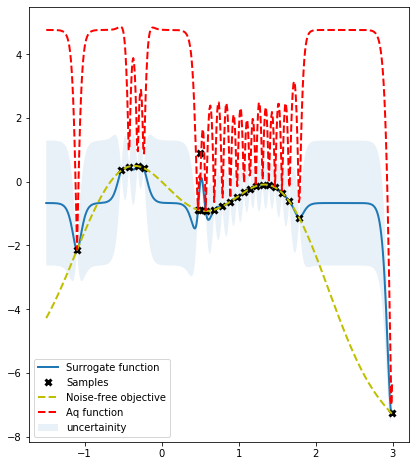

Iteration count: 22
alpha:  5.493927171877288
alpha:  5.493927171877288
-0.10257171310432267 0.22056073700734175


/Users/mohagg01/.local/share/virtualenvs/mango/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:346: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


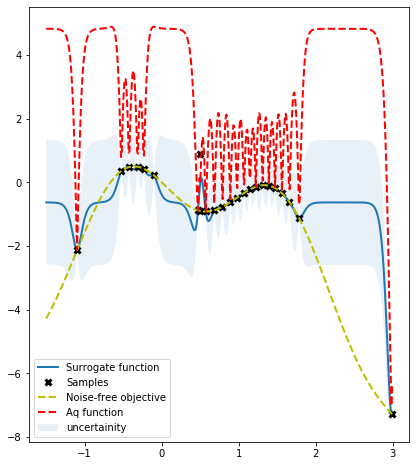

Iteration count: 23
alpha:  5.510085554705563
alpha:  5.510085554705563
-0.6627792466456449 0.010866891707463244


/Users/mohagg01/.local/share/virtualenvs/mango/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:346: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


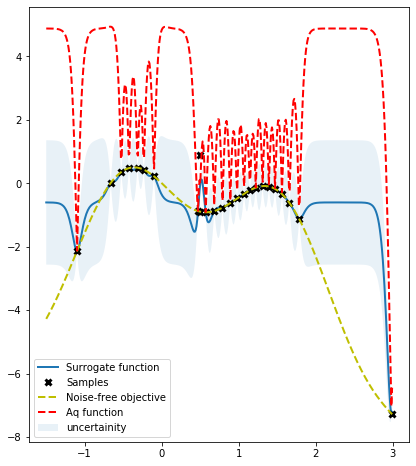

Iteration count: 24
alpha:  5.5255118566382695
alpha:  5.5255118566382695
0.03193553113898928 -0.07432510044337523


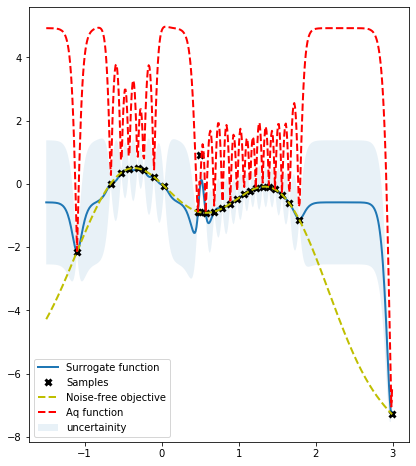

Iteration count: 25
alpha:  5.540267976906091
alpha:  5.540267976906091
-0.8252465863444574 -0.6409744734585695


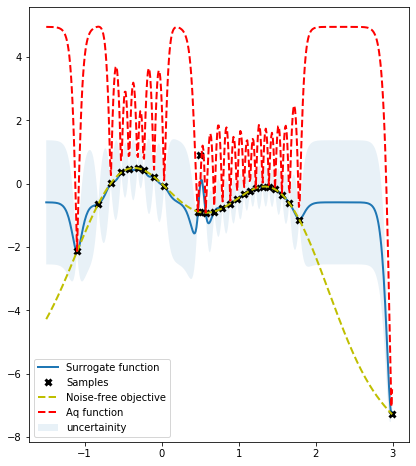

Iteration count: 26
alpha:  5.554408349099321
alpha:  5.554408349099321
2.3408454171443007 -4.514773937334711


/Users/mohagg01/.local/share/virtualenvs/mango/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:346: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


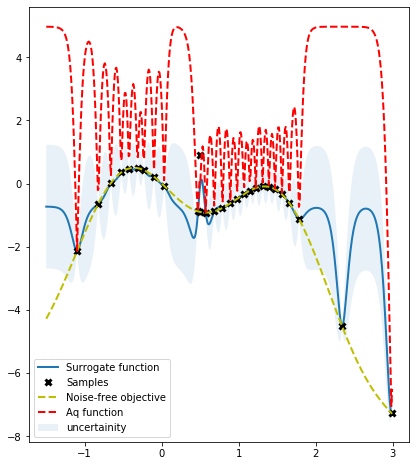

Iteration count: 27
alpha:  5.567981090168646
alpha:  5.567981090168646
-1.4970109767804805 -4.264550170204096


/Users/mohagg01/.local/share/virtualenvs/mango/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:346: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


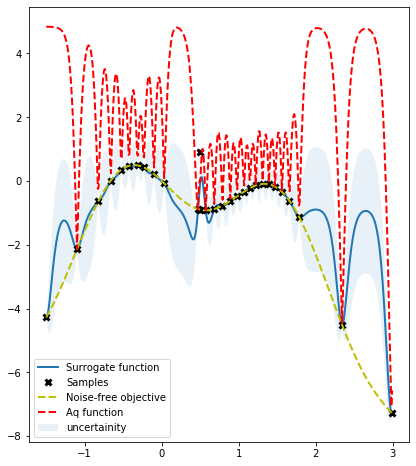

Iteration count: 28
alpha:  5.581028937136872
alpha:  5.581028937136872
0.20373151704181258 -0.472740631709446


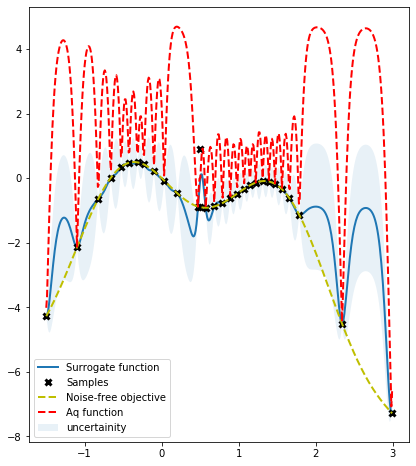

Iteration count: 29
alpha:  5.593590016832143
alpha:  5.593590016832143
2.0168679590402854 -2.425458580027951


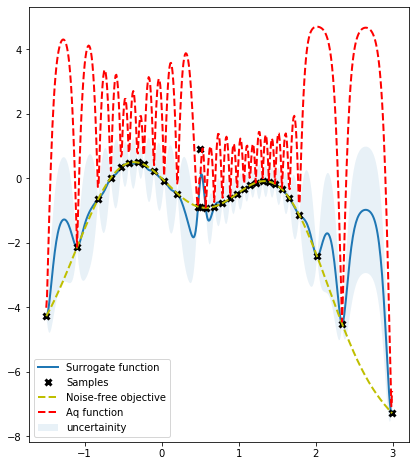

Iteration count: 30
alpha:  5.605698483071216
alpha:  5.605698483071216
2.6501610816104977 -6.163588333276336


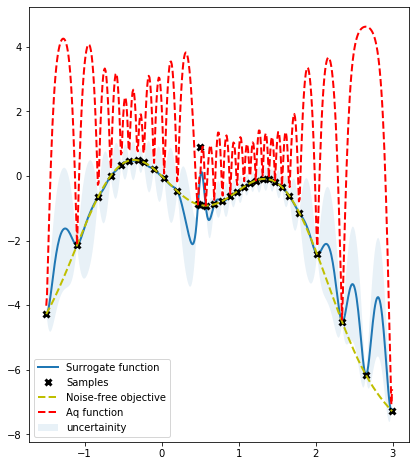

Iteration count: 31
alpha:  5.61738504772451
alpha:  5.61738504772451
-1.2792443011496322 -3.173197788990336


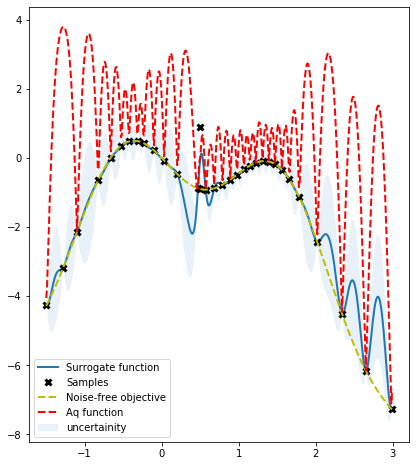

Iteration count: 32
alpha:  5.628677426150589
alpha:  5.628677426150589
-0.9389202811677574 -1.2196660951577813


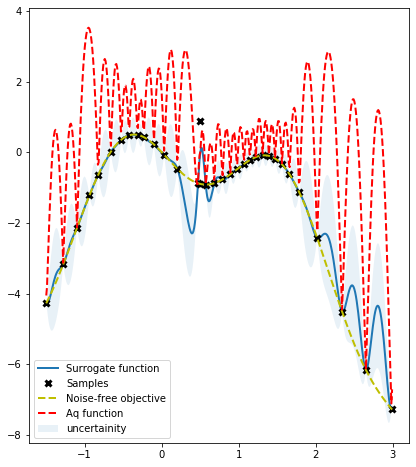

Iteration count: 33
alpha:  5.6396007130225305
alpha:  5.6396007130225305
0.11641766929100972 -0.2742567130513551


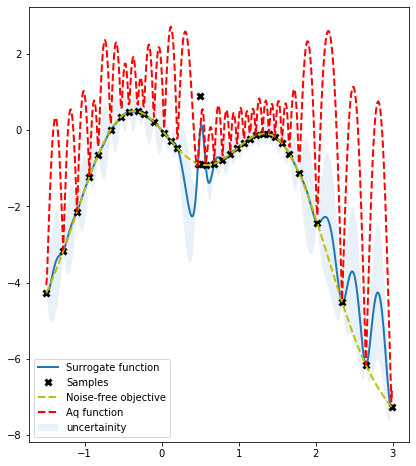

Iteration count: 34
alpha:  5.650177701180995
alpha:  5.650177701180995
2.160902789690168 -3.3550707908243536


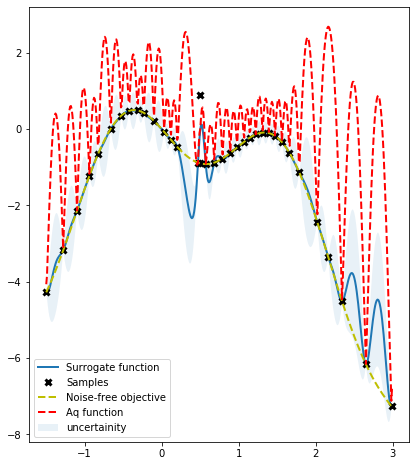

Iteration count: 35
alpha:  5.660429153555053
alpha:  5.660429153555053
0.30908939732717156 -0.6791574615068352


/Users/mohagg01/.local/share/virtualenvs/mango/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:346: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


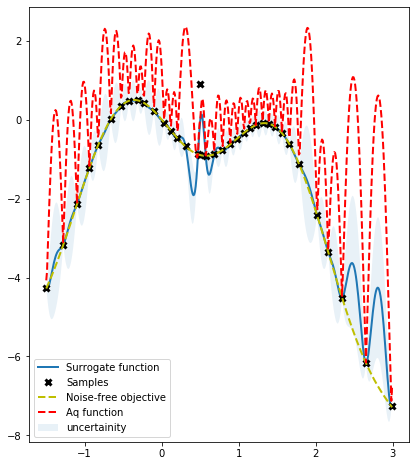

Iteration count: 36
alpha:  5.670374036188685
alpha:  5.670374036188685
1.893030233196224 -1.6904251444697982


/Users/mohagg01/.local/share/virtualenvs/mango/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:346: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


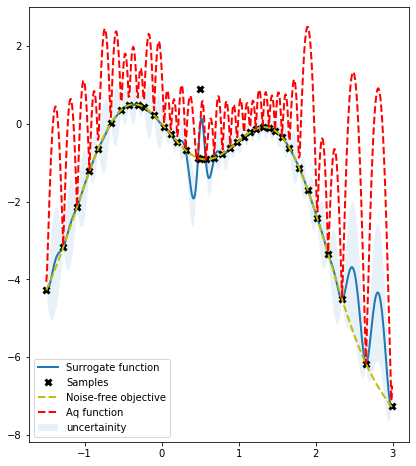

Iteration count: 37
alpha:  5.680029718851409
alpha:  5.680029718851409
-0.5932000286282494 0.21115328914338716


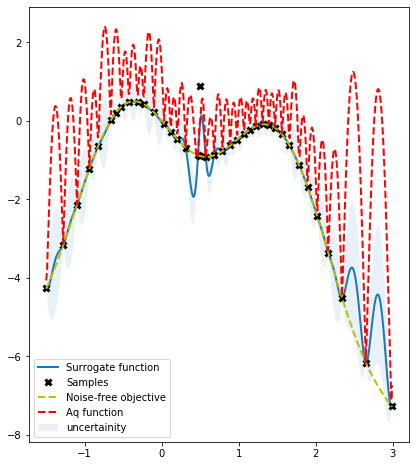

Iteration count: 38
alpha:  5.689412148488089
alpha:  5.689412148488089
-0.17070175311300484 0.3413832015271087


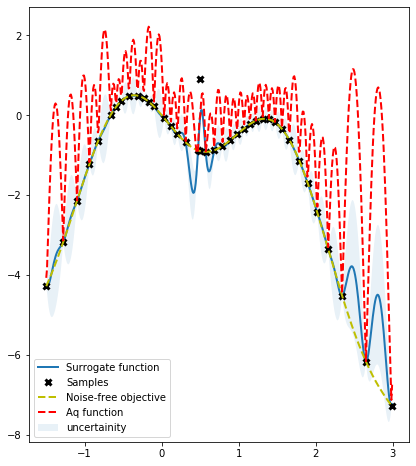

Iteration count: 39
alpha:  5.698535999796518
alpha:  5.698535999796518
-0.747889194445149 -0.30082525598096155


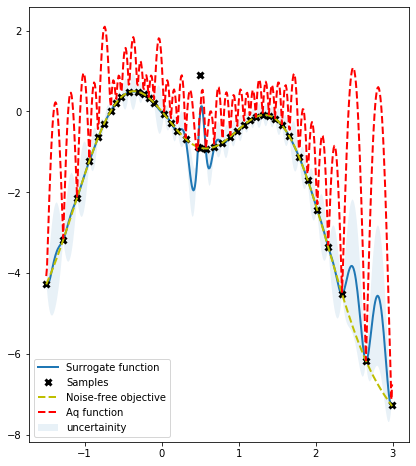

Iteration count: 40
alpha:  5.707414806452573
alpha:  5.707414806452573
-0.3656211792279753 0.5001666195166135


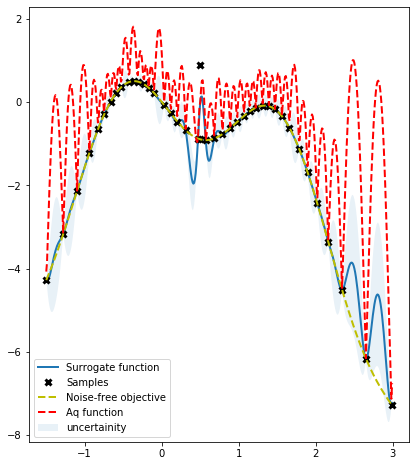

In [146]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, Matern
noise = 0.01

# Gaussian process with Matern kernel as surrogate model
gpr = GaussianProcessRegressor(kernel=Matern(nu=2.5),n_restarts_optimizer=10,random_state =1 ,normalize_y=True)


# Number of iterations
n_iter = 40

X_sample = X_init
Y_sample = Y_init
gpr.fit(X_sample, Y_sample)

#Printing the starting assumption
print('Starting GPR Assumption')
# Plot_the_function_and_Exact_values(gpr,X_sample,Y_sample)

for i in range(n_iter):
    
    print('Iteration count:',i+1)
    
    domain_list = ds.get_domain()
    X_domain_np = ds.convert_GP_space(domain_list)
        
    curr_sample, _ = Upper_Confidence_Bound(X_domain_np,gpr,i+1)
    _, aq_fn_values = Upper_Confidence_Bound(a_array, gpr, i+1)
    results = get_objective(curr_sample[0])
    print(curr_sample[0],results)
    
    X_sample = np.vstack((X_sample, curr_sample))
    Y_sample = np.vstack((Y_sample, results))
    
    
    gpr.fit(X_sample, Y_sample)
    Plot_the_function_and_Exact_values(gpr,X_sample,Y_sample, aq_fn_values)
    

# Scatter Plot

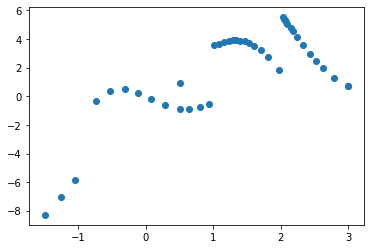

In [111]:
import matplotlib.pyplot as plt

fig = plt.figure()

plt.scatter(X_sample[:,0], Y_sample, marker='o')

plt.show()